In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/TB data.zip"

Archive:  /content/drive/MyDrive/TB data.zip
   creating: TB data/Normal/
  inflating: TB data/Normal/Normal-1.png  
  inflating: TB data/Normal/Normal-10.png  
  inflating: TB data/Normal/Normal-100.png  
  inflating: TB data/Normal/Normal-101.png  
  inflating: TB data/Normal/Normal-102.png  
  inflating: TB data/Normal/Normal-103.png  
  inflating: TB data/Normal/Normal-104.png  
  inflating: TB data/Normal/Normal-105.png  
  inflating: TB data/Normal/Normal-106.png  
  inflating: TB data/Normal/Normal-107.png  
  inflating: TB data/Normal/Normal-108.png  
  inflating: TB data/Normal/Normal-109.png  
  inflating: TB data/Normal/Normal-11.png  
  inflating: TB data/Normal/Normal-110.png  
  inflating: TB data/Normal/Normal-111.png  
  inflating: TB data/Normal/Normal-112.png  
  inflating: TB data/Normal/Normal-113.png  
  inflating: TB data/Normal/Normal-114.png  
  inflating: TB data/Normal/Normal-115.png  
  inflating: TB data/Normal/Normal-116.png  
  inflating: TB data/Normal/No

In [ ]:
pip install tensorflow numpy matplotlib scikit-learn

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

In [ ]:
base_dir = '/content/TB data'
normal_dir = base_dir + '/content/TB data/Normal'
tuberculosis_dir = base_dir + '/content/TB data/Tuberculosis'

In [4]:
img_width, img_height = 150, 150
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into 80% training and 20% validation
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Specify 'training' for the training set
)

Found 1120 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 280 images belonging to 2 classes.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

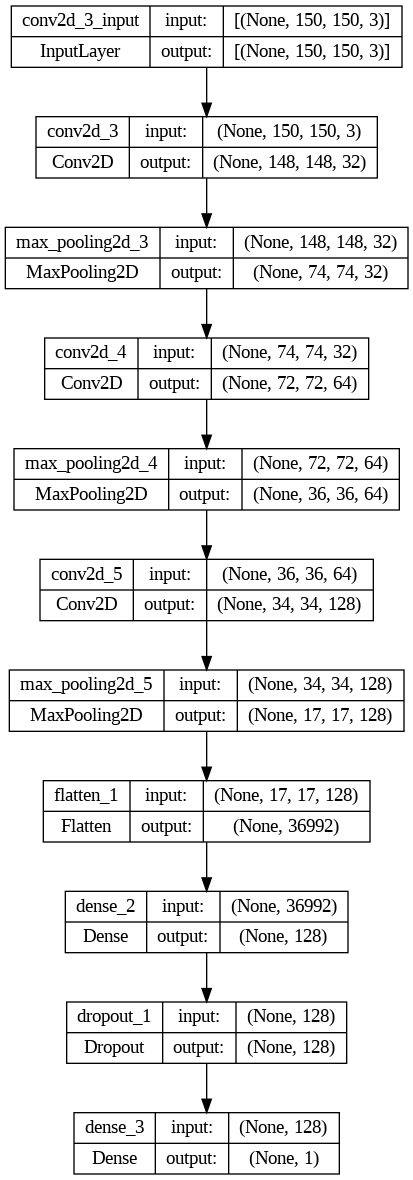

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
epochs = 50
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/50
35/35 [==============================] - 21s 527ms/step - loss: 0.0742 - accuracy: 0.9723 - val_loss: 0.1688 - val_accuracy: 0.9453
Epoch 2/50
35/35 [==============================] - 18s 514ms/step - loss: 0.0870 - accuracy: 0.9670 - val_loss: 0.0714 - val_accuracy: 0.9844
Epoch 3/50
35/35 [==============================] - 18s 514ms/step - loss: 0.0951 - accuracy: 0.9598 - val_loss: 0.0929 - val_accuracy: 0.9727
Epoch 4/50
35/35 [==============================] - 19s 545ms/step - loss: 0.1111 - accuracy: 0.9598 - val_loss: 0.0851 - val_accuracy: 0.9688
Epoch 5/50
35/35 [==============================] - 19s 531ms/step - loss: 0.0711 - accuracy: 0.9741 - val_loss: 0.0670 - val_accuracy: 0.9688
Epoch 6/50
35/35 [==============================] - 18s 519ms/step - loss: 0.0588 - accuracy: 0.9795 - val_loss: 0.0584 - val_accuracy: 0.9727
Epoch 7/50
35/35 [==============================] - 20s 584ms/step - loss: 0.0760 - accuracy: 0.9661 - val_loss: 0.0652 - val_accuracy: 0.9805

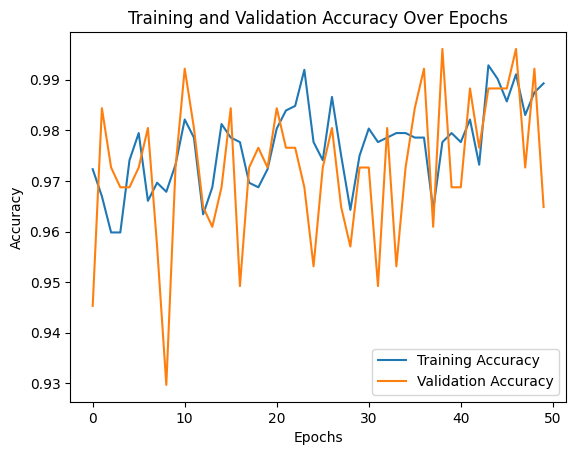

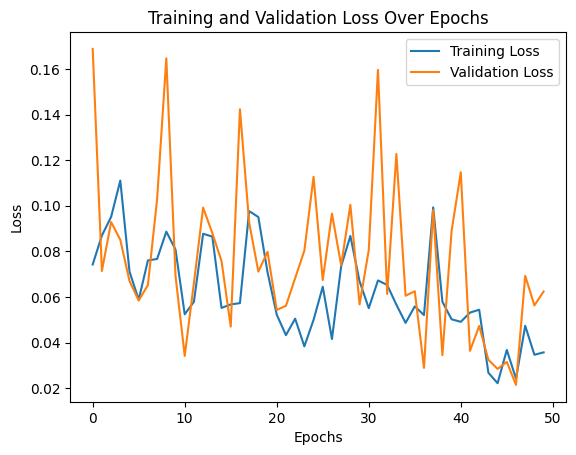

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training/validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def load_and_display_samples(directory, num_samples=5):
    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Sample Images from {directory.split("/")[-1]}', fontsize=16)
    for i in range(num_samples):
        random_image_path = random.choice(validation_generator.filepaths)
        img = image.load_img(random_image_path, target_size=(img_width, img_height))
        img_array = image.img_to_array(img)
        img_array /= 255.0  # Normalize the pixel values to be between 0 and 1
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img_array)
        plt.title('Normal' if 'normal' in random_image_path else 'Tuberculosis')
        plt.axis('off')
    plt.show()


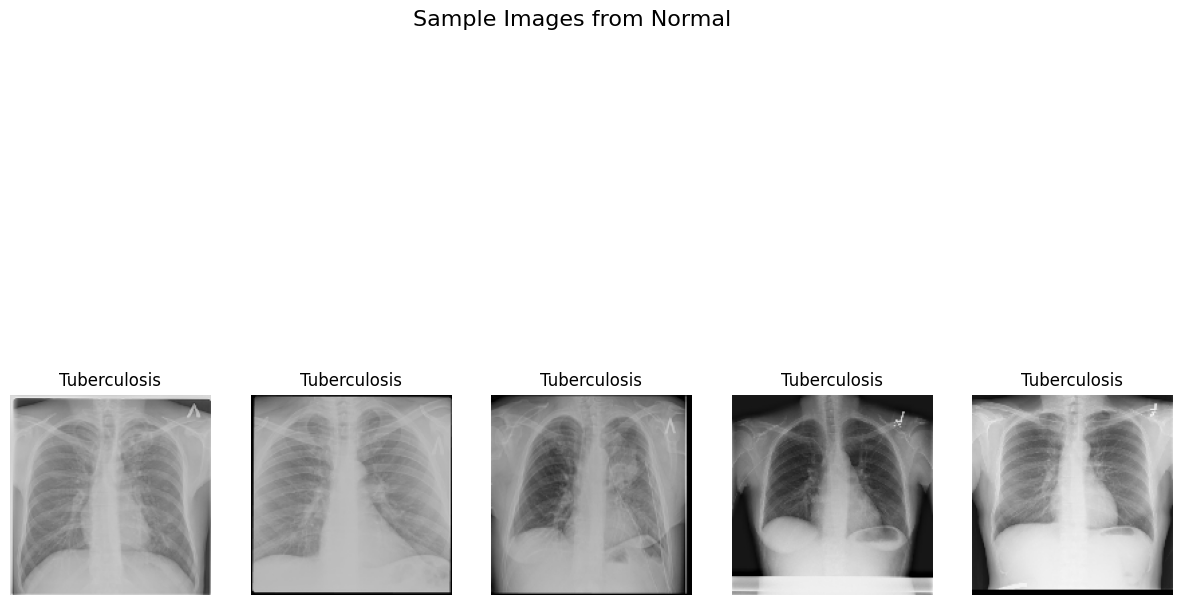

In [ ]:
load_and_display_samples(normal_dir)

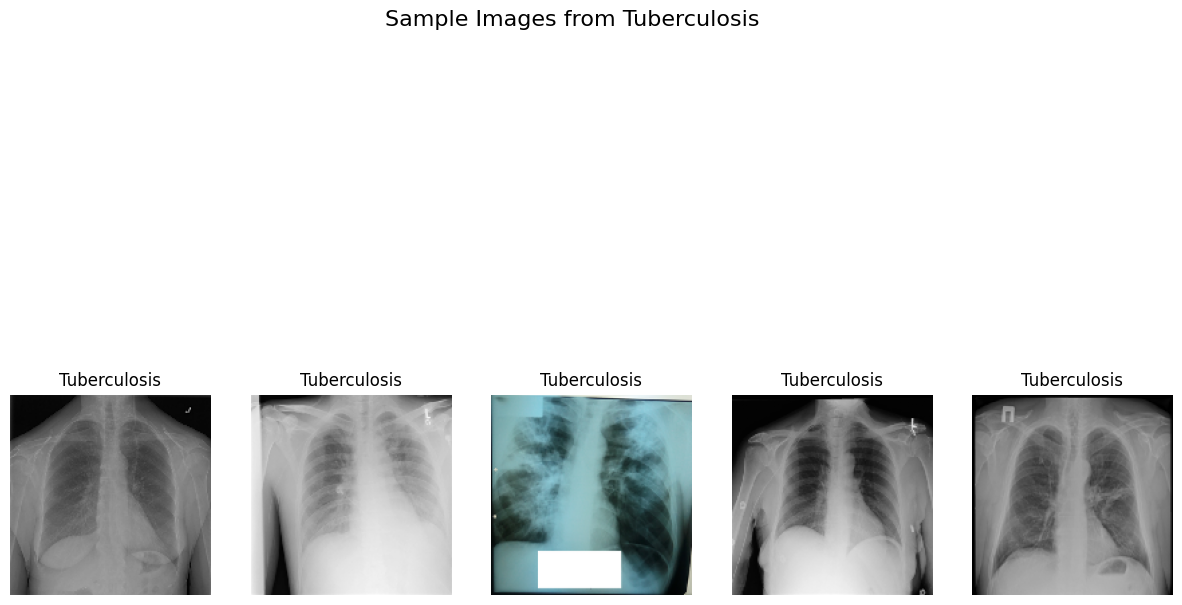

In [ ]:
load_and_display_samples(tuberculosis_dir)


In [ ]:
validation_generator.reset()
y_pred = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
y_true = validation_generator.classes


9/9 [==============================] - 3s 370ms/step


In [ ]:
y_pred_class = np.round(y_pred)

In [ ]:
cm = confusion_matrix(y_true, y_pred_class)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[74 66]
 [71 69]]


In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


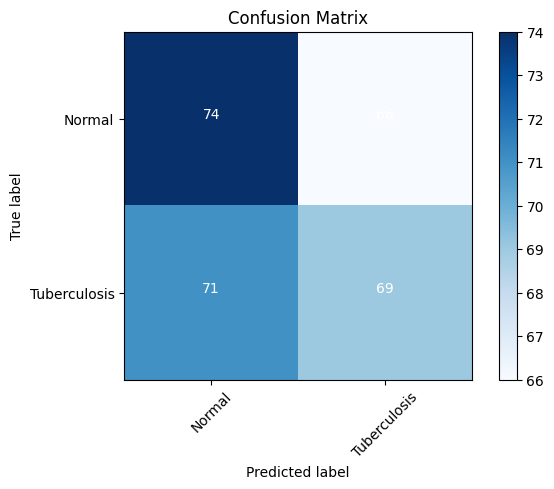

In [ ]:
import itertools

# Define class labels
class_labels = ['Normal', 'Tuberculosis']

# Plot confusion matrix
plot_confusion_matrix(cm, classes=class_labels, title='Confusion Matrix')

# Display the confusion matrix
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/tb_model.h5')

NameError: name 'model' is not defined

In [5]:
model = load_model('/content/drive/MyDrive/tb_detection_model.h5')

In [45]:
image_path = '/content/drive/MyDrive/TB data/Tuberculosis/Tuberculosis-5.png'

In [46]:
img = image.load_img(image_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [47]:
prediction = model.predict(img_array)

1/1 [==============================] - 0s 27ms/step


In [48]:
class_labels = ['Normal', 'Tuberculosis']
predicted_class = class_labels[int(np.round(prediction[0]))]

<ipython-input-48-cdd16787763a>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(np.round(prediction[0]))]


In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

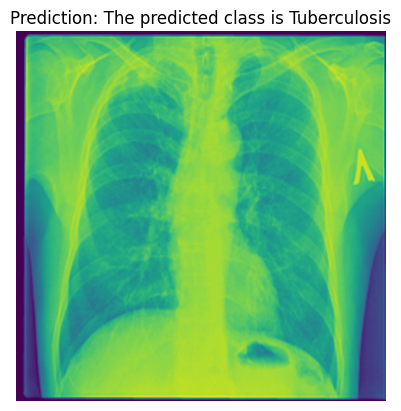

In [50]:
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Prediction: The predicted class is {predicted_class}')
plt.axis('off')
plt.show()